# BlobCity AutoAI

In [ ]:
!pip install blobcity

     |████████████████████████████████| 76 kB 4.7 MB/s 
     |████████████████████████████████| 80 kB 11.2 MB/s 
     |████████████████████████████████| 15.7 MB 62.6 MB/s 
     |████████████████████████████████| 76.1 MB 1.4 MB/s 
     |████████████████████████████████| 96 kB 6.6 MB/s 
     |████████████████████████████████| 173.6 MB 10 kB/s 
     |████████████████████████████████| 2.0 MB 36.9 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 308 kB 79.6 MB/s 
     |████████████████████████████████| 596 kB 57.0 MB/s 
     |████████████████████████████████| 112 kB 74.7 MB/s 
     |████████████████████████████████| 49 kB 8.5 MB/s 
     |████████████████████████████████| 149 kB 71.6 MB/s 
     |████████████████████████████████| 210 kB 65.4 MB/s 
     |████████████████████████████████| 75 kB 5.7 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=b11761c8585388be64e1359a49e3fb83068711e6992f8ce71

***Restart the runtime before proceeding***

In [ ]:
!sudo pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1

  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to /tmp/pip-req-build-_tl7t7p3
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-_tl7t7p3
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-py3-none-any.whl size=85445 sha256=6adff48527d437ad36de6f449710a25d82c7481e31990350a7a48289b7091efb
  Stored in directory: /tmp/pip-ephem-wheel-cache-g2q9ek9u/wheels/44/e5/92/e83049ca00432aec622a4fa0200e254d88aefae9d74aa86941
Successfully built keras-tuner


In [ ]:
!pip install autokeras

     |████████████████████████████████| 166 kB 7.1 MB/s 
     |████████████████████████████████| 97 kB 10.0 MB/s 
     |████████████████████████████████| 454.4 MB 20 kB/s 
     |████████████████████████████████| 4.0 MB 47.1 MB/s 
     |████████████████████████████████| 132 kB 64.1 MB/s 
     |████████████████████████████████| 14.8 MB 52.9 MB/s 
     |████████████████████████████████| 1.2 MB 55.8 MB/s 
     |████████████████████████████████| 462 kB 77.2 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68713 sha256=f6a851bf2646fe8da26304b372ceeed1bfc18103d73fdb7f6d768b11fe28ad2e
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: numpy
    Found 

***Restart the runtime before proceeding***

In [ ]:
import blobcity as bc

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import plot_model

# Setting up dataset

## Superconductors dataset (regression task)

Source: https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data


The dataset contains 81 numerical features of 21263 superconductors. The label corresponds to their critical temperature measured in Kelvin.

In [ ]:
!wget 'https://raw.githubusercontent.com/abcom-mltutorials/automl/main/superconductors.csv'

--2022-02-02 13:16:55--  https://raw.githubusercontent.com/abcom-mltutorials/automl/main/superconductors.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23859780 (23M) [text/plain]
Saving to: ‘superconductors.csv’

superconductors.csv 100%[===================>]  22.75M  --.-KB/s    in 0.1s    

2022-02-02 13:16:56 (162 MB/s) - ‘superconductors.csv’ saved [23859780/23859780]



In [ ]:
regressor_df=pd.read_csv('/content/superconductors.csv')

In [ ]:
regressor_df.shape

(21263, 82)

In [ ]:
features_regressor = regressor_df.iloc[:,:-1]
label_regressor = regressor_df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_regressor, X_val_regressor, label_train_regressor, label_val_regressor = train_test_split(features_regressor, label_regressor, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def error_metrics(y_pred,y_val):
  print('MSE: ',mean_squared_error(y_pred,y_val))
  print('RMSE: ',np.sqrt(mean_squared_error(y_pred,y_val)))
  print('Coefficient of determination: ',r2_score(y_pred,y_val))

### Regressor

In [ ]:
import time
tic = time.perf_counter()

In [ ]:
model_reg = bc.train(df=pd.concat([X_train_regressor, label_train_regressor], axis=1), target="critical_temp")

Quick Search (Stage 1 of 4) ::   0%|           [elapsed: 00:00< remaining:?]

Deep Search (Stage 2 of 4) ::   0%|           [elapsed: 00:00< remaining:?]

Tuning ExtraTreesRegressor (Stage 3 of 4) ::   0%|           [elapsed: 00:00< remaining:?]

Neural Networks (stage 4 of 4):   0%|           [elapsed: 00:00< remaining:?]

Epoch 1/20
532/532 [==============================] - 3s 4ms/step - loss: 352.1701 - mean_squared_error: 352.1701
Epoch 2/20
532/532 [==============================] - 2s 5ms/step - loss: 248.7822 - mean_squared_error: 248.7822
Epoch 3/20
532/532 [==============================] - 2s 4ms/step - loss: 227.6479 - mean_squared_error: 227.6479
Epoch 4/20
532/532 [==============================] - 2s 4ms/step - loss: 215.9515 - mean_squared_error: 215.9515
Epoch 5/20
532/532 [==============================] - 2s 4ms/step - loss: 204.8756 - mean_squared_error: 204.8756
Epoch 6/20
532/532 [==============================] - 2s 4ms/step - loss: 195.9987 - mean_squared_error: 195.9987
Epoch 7/20
532/532 [==============================] - 2s 4ms/step - loss: 188.7831 - mean_squared_error: 188.7831
Epoch 8/20
532/532 [==============================] - 2s 4ms/step - loss: 181.9667 - mean_squared_error: 181.9667
Epoch 9/20
532/532 [==============================] - 2s 4ms/step - loss: 178.4224 - mea

In [ ]:
toc = time.perf_counter()
print (f"Elapsed time {toc - tic:0.4f} seconds")

Elapsed time 2601.2308 seconds


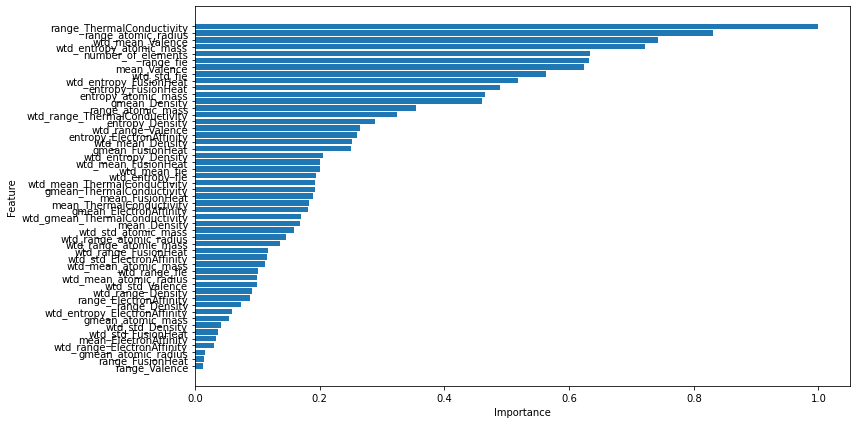

In [ ]:
model_reg.plot_feature_importance() 

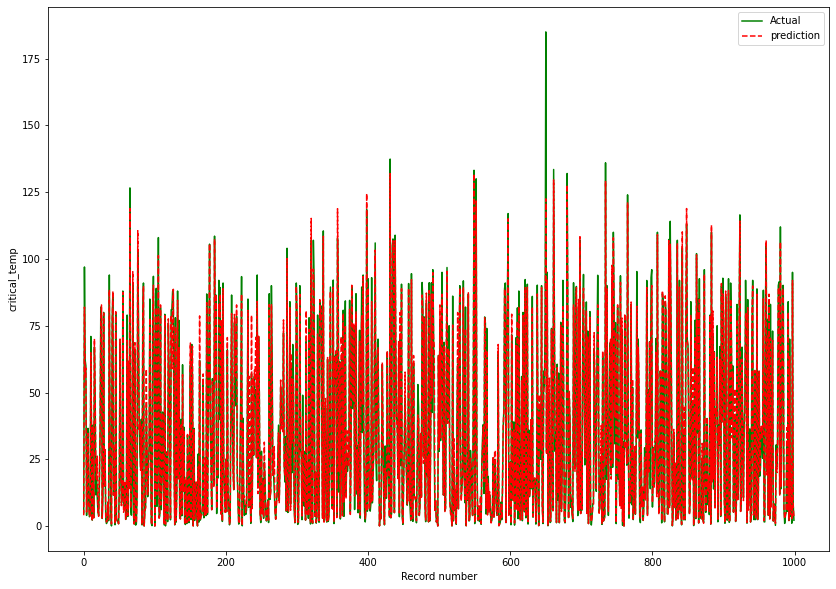

In [ ]:
model_reg.plot_prediction()

In [ ]:
prediction_reg=model_reg.predict(X_val_regressor)

In [ ]:
error_metrics(label_val_regressor, prediction_reg)

MSE:  77.74966208588508
RMSE:  8.817576882901848
Coefficient of determination:  0.9324550583579856


## Biodegradation dataset (classification task)

Source: https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation


The dataset contains 21 numerical features (molecular attributes) of 1055 chemicals. The label corresponds to their experimental class (ready biodegradable "RB" or not ready biodegradable "NRB")

In [ ]:
!wget 'https://raw.githubusercontent.com/abcom-mltutorials/automl/main/biodeg.csv'

--2022-02-02 14:00:20--  https://raw.githubusercontent.com/abcom-mltutorials/automl/main/biodeg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155987 (152K) [text/plain]
Saving to: ‘biodeg.csv’

biodeg.csv          100%[===================>] 152.33K  --.-KB/s    in 0.01s   

2022-02-02 14:00:20 (11.0 MB/s) - ‘biodeg.csv’ saved [155987/155987]



In [ ]:
classifier_df=pd.read_csv('/content/biodeg.csv', delimiter=';', header=None)

In [ ]:
classifier_df.shape

(1055, 42)

In [ ]:
classifier_df.rename(columns={41:'label'}, inplace=True)

In [ ]:
classifier_df.columns = classifier_df.columns.astype(str)

In [ ]:
features_classifier = classifier_df.iloc[:,:-1]
label_classifier = classifier_df.iloc[:,-1]

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)
X_classifier, y_classifier = sm.fit_resample(features_classifier, label_classifier)

In [ ]:
y_classifier.value_counts()

RB     699
NRB    699
Name: label, dtype: int64

In [ ]:
y_classifier = y_classifier.replace('NRB',0).replace('RB',1)

In [ ]:
X_train_classifier, X_val_classifier, label_train_classifier, label_val_classifier = train_test_split(X_classifier, y_classifier, random_state=42, test_size = 0.2)

### Classifier

In [ ]:
import time
tic = time.perf_counter()

In [ ]:
model_class = bc.train(df=pd.concat([X_train_classifier,label_train_classifier], axis=1), target="label")

Quick Search (Stage 1 of 4) ::   0%|           [elapsed: 00:00< remaining:?]

Deep Search (Stage 2 of 4) ::   0%|           [elapsed: 00:00< remaining:?]

Tuning ExtraTreesClassifier (Stage 3 of 4) ::   0%|           [elapsed: 00:00< remaining:?]

Neural Networks (stage 4 of 4):   0%|           [elapsed: 00:00< remaining:?]

Epoch 1/20
35/35 [==============================] - 1s 5ms/step - loss: 0.4925 - accuracy: 0.7719
Epoch 2/20
35/35 [==============================] - 0s 4ms/step - loss: 0.3577 - accuracy: 0.8462
Epoch 3/20
35/35 [==============================] - 0s 5ms/step - loss: 0.3169 - accuracy: 0.8810
Epoch 4/20
35/35 [==============================] - 0s 5ms/step - loss: 0.2964 - accuracy: 0.8864
Epoch 5/20
35/35 [==============================] - 0s 5ms/step - loss: 0.2811 - accuracy: 0.8953
Epoch 6/20
35/35 [==============================] - 0s 5ms/step - loss: 0.2682 - accuracy: 0.8971
Epoch 7/20
35/35 [==============================] - 0s 5ms/step - loss: 0.2569 - accuracy: 0.9043
Epoch 8/20
35/35 [==============================] - 0s 5ms/step - loss: 0.2479 - accuracy: 0.9016
Epoch 9/20
35/35 [==============================] - 0s 5ms/step - loss: 0.2387 - accuracy: 0.9052
Epoch 10/20
35/35 [==============================] - 0s 5ms/step - loss: 0.2303 - accuracy: 0.9079
Epoch 11/20
35/35 [

In [ ]:
toc = time.perf_counter()
print (f"Elapsed time {toc - tic:0.4f} seconds")

Elapsed time 380.5372 seconds


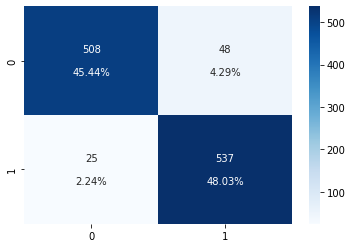

In [ ]:
model_class.plot_prediction()

In [ ]:
prediction_class=model_class.predict(X_val_classifier)

9/9 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(prediction_class, label_val_classifier))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       136
           1       0.93      0.88      0.90       144

    accuracy                           0.90       280
   macro avg       0.90      0.90      0.90       280
weighted avg       0.90      0.90      0.90       280

